<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head(2)

,age,bought_insurance
0,22,0
1,25,0


In [5]:
df.age

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64

In [6]:
df.bought_insurance

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

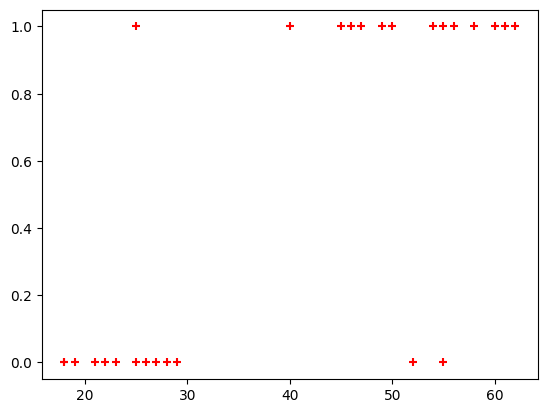

In [7]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [23]:
print(type(df[['age']]))


print(type(df['age']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [13]:
X_test

5     56
14    49
24    50
6     55
7     60
12    27
Name: age, dtype: int64

In [14]:
y_test

5     1
14    1
24    1
6     0
7     1
12    0
Name: bought_insurance, dtype: int64

In [15]:
len(X_train)  # X_test, y_train, y_test

21

In [16]:
len(y_train)

21

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
X_test

,age
9,61
6,55
4,46
10,18
22,40
26,23


In [35]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0, 1, 0], dtype=int64)

#the logistic regression model returns probability estimates for each class — not just a “yes/no” prediction.

If your target variable (y) has two classes (e.g. 0 = no, 1 = yes),
then for each test sample, you’ll get two probabilities:
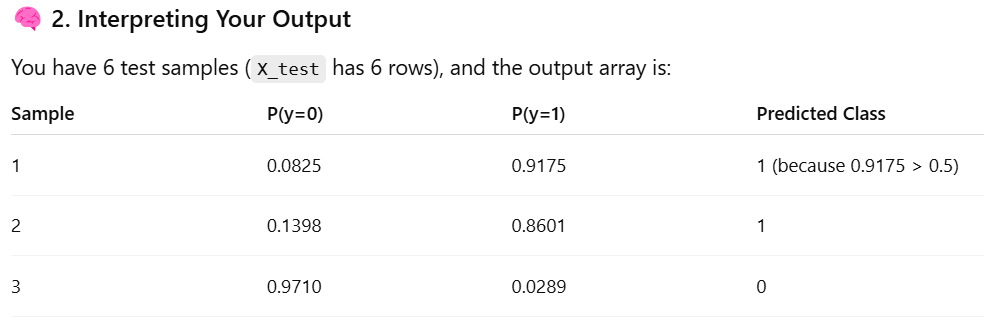

In [27]:
model.predict_proba(X_test)

array([[0.02598685, 0.97401315],
       [0.06418232, 0.93581768],
       [0.22037528, 0.77962472],
       [0.95861268, 0.04138732],
       [0.42083677, 0.57916323],
       [0.91338845, 0.08661155]])

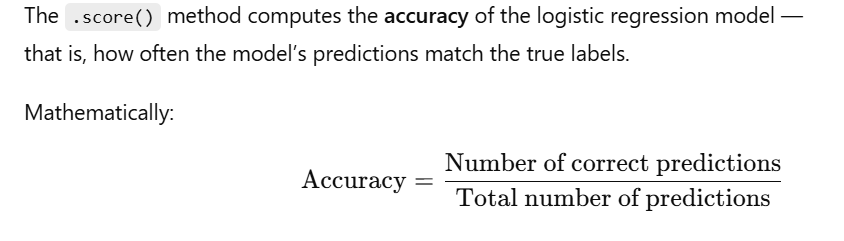

In [ ]:
Uses the model to make predictions on X_test

Compares those predictions to the real labels (y_test)

Returns a single numeric value = the model’s performance score

In [33]:
model.score(X_test, y_test)

0.8333333333333334

In [40]:
print(y_test.values)

[1 0 1 0 1 0]


In [38]:
print(y_predicted)

[1 1 1 0 1 0]


In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.8333333333333334


In [40]:
y_predicted

array([1, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
X_test

,age
4,46
8,62
26,23
17,58
24,50
25,54


**model.coef_ indicates value of m in y=m*x + b equation**

In [42]:
model.coef_

array([[0.1573569]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [43]:
model.intercept_

array([-5.97493686])

**Lets defined sigmoid function now and do the math with hand**

In [44]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [45]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    print(f"z is {z}")
    y = sigmoid(z)
    
    return y

In [46]:
age = 35
prediction_function(age)

z is -0.05999999999999983


0.4850044983805899

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [18]:
age = 43
prediction_function(age)

0.568565299077705

**0.485 is more than 0.5 which means person with 43 will buy the insurance**